<a href="https://colab.research.google.com/github/Abhishek1923/Edureka_DSML/blob/main/Twitter_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project 3: Twitter Sentimental Analysis Using NLP and Python**

**Importin Librarires**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [ ]:
twitter_data = pd.read_csv('/content/Twitter_Data.csv')
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


**Creating column with categorical values**

In [ ]:
twitter_data['category_name'] = twitter_data['category'].replace({-1:'Negative',0:'Neutral',1:'Positive'})
twitter_data.head()

,clean_text,category,category_name
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


**Checking null values**

In [ ]:
twitter_data.shape
twitter_data.isnull().sum()

clean_text       1
category         1
category_name    1
dtype: int64

**Handling null values**

In [ ]:
twitter_data.dropna(inplace=True)
twitter_data.isnull().sum()

clean_text       0
category         0
category_name    0
dtype: int64

**Importing NLP libraries**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Calculating each sentence length**

In [ ]:
def sentence_length(x):
  return len(word_tokenize(x['clean_text']))

In [ ]:
twitter_data['sentence_length'] = twitter_data.apply(sentence_length,axis=1)
twitter_data.head()

,clean_text,category,category_name,sentence_length
0,when modi promised “minimum government maximum...,-1.0,Negative,35
1,talk all the nonsense and continue all the dra...,0.0,Neutral,13
2,what did just say vote for modi welcome bjp t...,1.0,Positive,22
3,asking his supporters prefix chowkidar their n...,1.0,Positive,34
4,answer who among these the most powerful world...,1.0,Positive,14


**Filtering non alpha-numeric characters and stopwords**

In [ ]:
import re
wnl = WordNetLemmatizer()
filtered_corpus = []
for i in twitter_data['clean_text']:
  i = re.sub('[^a-zA-Z0-9]',' ',i)
  i = i.lower()
  i = i.split()
  i = [wnl.lemmatize(word) for word in i if not i in stopwords.words('english')]
  i = ' '.join(i)
  filtered_corpus.append(i)
filtered_corpus

['when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why doe take year get justice state should and not business and should exit psus and temple',
 'talk all the nonsense and continue all the drama will vote for modi',
 'what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporter prefix chowkidar their name modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuse are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat woman perform yagna seek divine grace for narendra modi become again',
 'this come from cabinet which ha scholar like modi smriti and hema time introspect',
 'with upcoming election india saga going important pair look current modi lead govt elec

**Importing Neural Network Model libraries**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

**Calculating vocabulary size**

In [ ]:
vocalubary = set()
for i in filtered_corpus:
  for j in word_tokenize(i):
    vocalubary.add(j)

In [ ]:
voc_size = len(vocalubary)
one_hot_repr = [one_hot(words,voc_size) for words in filtered_corpus]

**Calculating maximum sentence length and performing one hot encoding**

In [ ]:
sent_length = twitter_data['sentence_length'].max()
print(sent_length)
embedded_docs = pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)

49


**Creating neural network architecture**

In [ ]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 49, 40)            1230800   
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,287,301
Trainable params: 1,287,301
Non-trainable params: 0
_________________________________________________________________
None


**Splitting into independent and dependent features**

In [ ]:
X_final = np.array(embedded_docs)
Y_final = np.array(twitter_data['category'])

**Splitting into train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size = 0.33, random_state = 0)

**Training model**

In [ ]:
model.fit(X_train,Y_train, validation_data = (X_test,Y_test), batch_size = 64, epochs = 10)

Epoch 1/10
251/251 [==============================] - 48s 161ms/step - loss: 0.5453 - accuracy: 0.3638 - val_loss: 0.1397 - val_accuracy: 0.4348
Epoch 2/10
251/251 [==============================] - 11s 42ms/step - loss: -1.2481 - accuracy: 0.5911 - val_loss: -2.5506 - val_accuracy: 0.6387
Epoch 3/10
251/251 [==============================] - 11s 42ms/step - loss: -5.2113 - accuracy: 0.6212 - val_loss: -5.7689 - val_accuracy: 0.6289
Epoch 4/10
251/251 [==============================] - 8s 30ms/step - loss: -10.1724 - accuracy: 0.6249 - val_loss: -8.2588 - val_accuracy: 0.6256
Epoch 5/10
251/251 [==============================] - 5s 19ms/step - loss: -15.8408 - accuracy: 0.6454 - val_loss: -11.8669 - val_accuracy: 0.6092
Epoch 6/10
251/251 [==============================] - 5s 21ms/step - loss: -21.3048 - accuracy: 0.6513 - val_loss: -14.1950 - val_accuracy: 0.6141
Epoch 7/10
251/251 [==============================] - 3s 12ms/step - loss: -27.8426 - accuracy: 0.6696 - val_loss: -14.8964

**Prediction with model**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
Y_pred = model.predict(X_test)

247/247 [==============================] - 1s 3ms/step


**Normalizing predictions  and Evaluation with model**

Confusion Matrix:


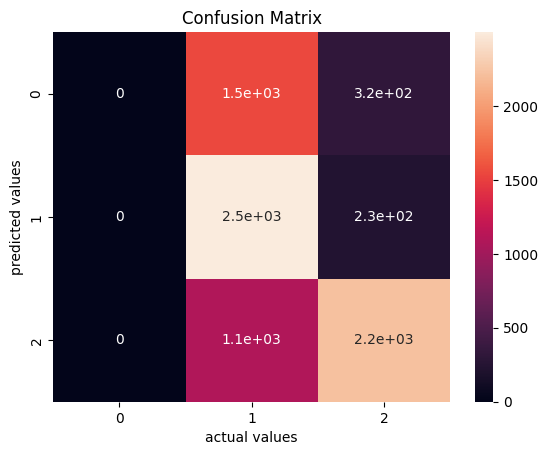

In [ ]:
Y_pred = np.where(Y_pred > 0.5, 1,0)
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix:')
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('accuracy : ',accuracy_score(Y_test,Y_pred))

accuracy :  0.5969620253164557


In [ ]:
print('classification report: ')
print('\n')
print(classification_report(Y_test,Y_pred,zero_division=0))

classification report: 


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1871
         0.0       0.49      0.92      0.64      2727
         1.0       0.80      0.67      0.73      3302

    accuracy                           0.60      7900
   macro avg       0.43      0.53      0.46      7900
weighted avg       0.50      0.60      0.52      7900

